# CNN Tutorial Classification
### Case: classification of date fruits

## Setup Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/Dataset

/content/gdrive/My Drive/Dataset


## Explore Data

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("kurma_dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'kurma_dataset'.
There are 6 directories and 0 images in 'kurma_dataset/train'.
There are 0 directories and 26 images in 'kurma_dataset/train/masyihia'.
There are 0 directories and 42 images in 'kurma_dataset/train/sequee'.
There are 0 directories and 64 images in 'kurma_dataset/train/sequeeiraq'.
There are 0 directories and 19 images in 'kurma_dataset/train/shagra'.
There are 0 directories and 56 images in 'kurma_dataset/train/sukari'.
There are 0 directories and 53 images in 'kurma_dataset/train/sukari_macnooz'.
There are 6 directories and 0 images in 'kurma_dataset/test'.
There are 0 directories and 5 images in 'kurma_dataset/test/sequeeiraq'.
There are 0 directories and 5 images in 'kurma_dataset/test/shagra'.
There are 0 directories and 5 images in 'kurma_dataset/test/masyihia'.
There are 0 directories and 5 images in 'kurma_dataset/test/sequee'.
There are 0 directories and 9 images in 'kurma_dataset/test/sukari_macnooz'.
There are 0 directo

In [6]:
# get label data
import pathlib
import numpy as np
data_dir = pathlib.Path("kurma_dataset/train") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['masyihia' 'sequee' 'sequeeiraq' 'shagra' 'sukari' 'sukari_macnooz']


In [7]:
# view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  # choose random
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (3024, 4032, 3)


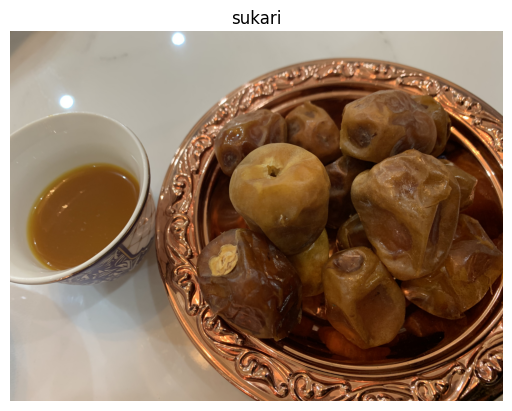

In [8]:
# view a random image from the training dataset
img = view_random_image(target_dir="kurma_dataset/train/",
                        target_class="sukari")

## Model 1 : CNN

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# set directory data
train_dir = "kurma_dataset/train/"
test_dir = "kurma_dataset/test/"

# set data generator
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

# CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3,
                         activation="relu", 
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(6, activation="softmax") 
])

# compile model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# train model

history_1 = model_1.fit(train_data,
                        epochs=30,
                        validation_data=valid_data)

Found 260 images belonging to 6 classes.
Found 38 images belonging to 6 classes.
Epoch 1/30
9/9 [==============================] - 106s 10s/step - loss: 1.7504 - accuracy: 0.3115 - val_loss: 1.7969 - val_accuracy: 0.2105
Epoch 2/30
9/9 [==============================] - 24s 3s/step - loss: 1.4096 - accuracy: 0.4423 - val_loss: 1.8116 - val_accuracy: 0.2895
Epoch 3/30
9/9 [==============================] - 23s 3s/step - loss: 1.2366 - accuracy: 0.5192 - val_loss: 2.0529 - val_accuracy: 0.2105
Epoch 4/30
9/9 [==============================] - 24s 3s/step - loss: 1.1724 - accuracy: 0.5692 - val_loss: 2.0363 - val_accuracy: 0.2368
Epoch 5/30
9/9 [==============================] - 23s 3s/step - loss: 1.0364 - accuracy: 0.6231 - val_loss: 1.8788 - val_accuracy: 0.3684
Epoch 6/30
9/9 [==============================] - 24s 3s/step - loss: 0.8573 - accuracy: 0.6885 - val_loss: 1.8737 - val_accuracy: 0.3684
Epoch 7/30
9/9 [==============================] - 24s 3s/step - loss: 0.7419 - accuracy: 

In [11]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

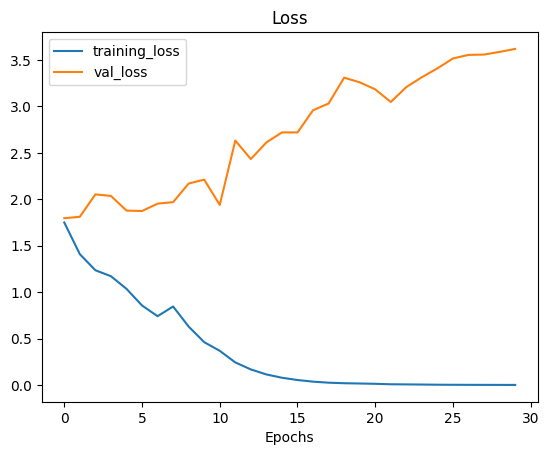

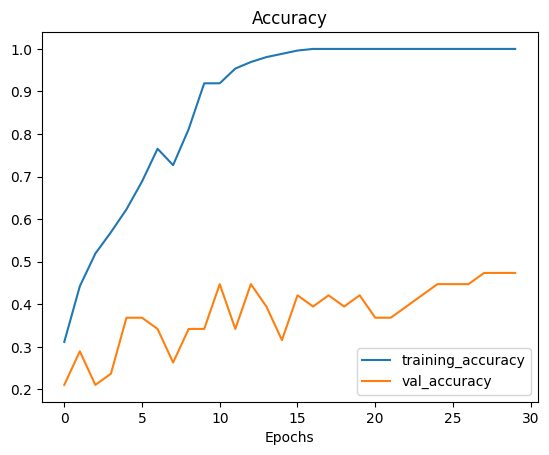

In [12]:
plot_loss_curves(history_1)

In [13]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

Saving sukari.jpg to sukari.jpg


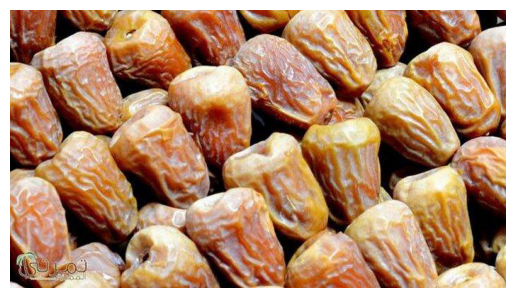

In [14]:
from google.colab import files

files.upload()
new_img = mpimg.imread("sukari.jpg")
plt.imshow(new_img)
plt.axis(False);

In [15]:
import tensorflow as tf
new_img = load_and_prep_image("sukari.jpg")
print(f"initial image size: {new_img.shape}")
new_img = tf.expand_dims(new_img, axis=0) 
print(f"Shape after new dimension: {new_img.shape}")


initial image size: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


In [16]:
pred = model_1.predict(new_img)
pred.argmax(axis=1)

1/1 [==============================] - 0s 180ms/step


array([4])

In [17]:
train_data.class_indices

{'masyihia': 0,
 'sequee': 1,
 'sequeeiraq': 2,
 'shagra': 3,
 'sukari': 4,
 'sukari_macnooz': 5}

## Model 2 : CNN + Augmentation

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data generator with augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.) 

test_datagen = ImageDataGenerator(rescale=1/255.)

In [19]:
# Set directory data
train_dir = "kurma_dataset/train/"
test_dir = "kurma_dataset/test/"

In [20]:
# augmented data
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=False)

# non-augmented data
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Augmented training images:
Found 260 images belonging to 6 classes.
Non-augmented training images:
Found 260 images belonging to 6 classes.
Unchanged test images:
Found 38 images belonging to 6 classes.


In [21]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

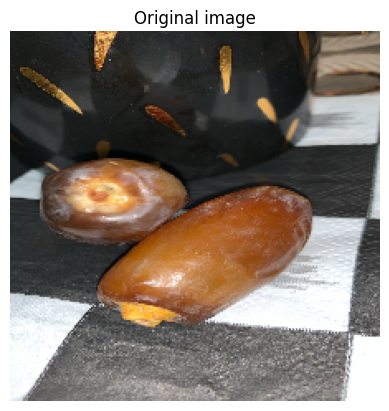

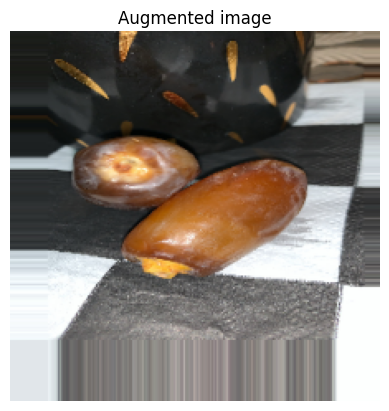

In [26]:
# original vs augmented
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(6, activation='softmax')
])

# Compile the model
model_2.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data_augmented,
                        epochs=10,
                        validation_data=test_data)

Epoch 1/10
9/9 [==============================] - 29s 3s/step - loss: 1.9517 - accuracy: 0.1231 - val_loss: 1.8240 - val_accuracy: 0.1316
Epoch 2/10
9/9 [==============================] - 26s 3s/step - loss: 1.7956 - accuracy: 0.2538 - val_loss: 1.7867 - val_accuracy: 0.1579
Epoch 3/10
9/9 [==============================] - 25s 3s/step - loss: 1.7797 - accuracy: 0.1462 - val_loss: 1.7705 - val_accuracy: 0.2105
Epoch 4/10
9/9 [==============================] - 25s 3s/step - loss: 1.7408 - accuracy: 0.2192 - val_loss: 1.7517 - val_accuracy: 0.2105
Epoch 5/10
9/9 [==============================] - 25s 3s/step - loss: 1.7620 - accuracy: 0.2923 - val_loss: 1.7930 - val_accuracy: 0.2368
Epoch 6/10
9/9 [==============================] - 26s 2s/step - loss: 1.6770 - accuracy: 0.2962 - val_loss: 1.7219 - val_accuracy: 0.2632
Epoch 7/10
9/9 [==============================] - 26s 3s/step - loss: 1.6039 - accuracy: 0.3308 - val_loss: 1.8147 - val_accuracy: 0.2632
Epoch 8/10
9/9 [==================

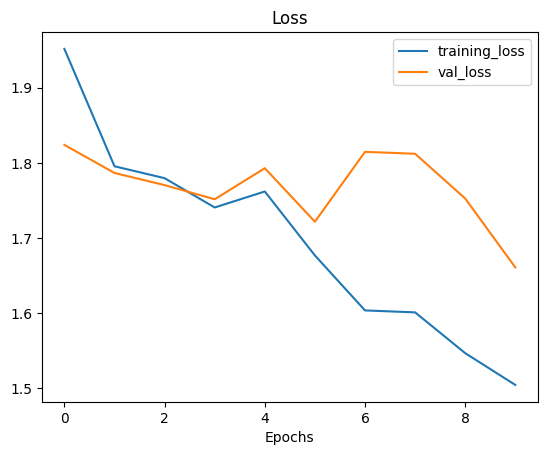

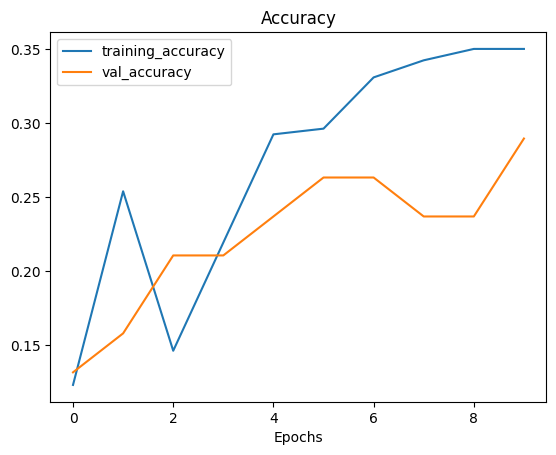

In [28]:
plot_loss_curves(history_2)

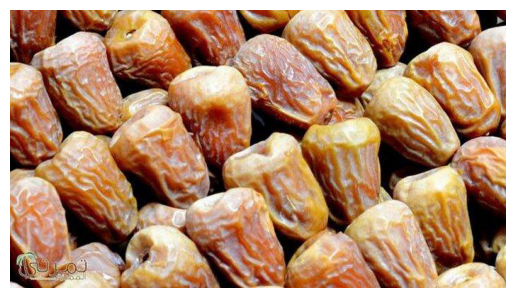

In [29]:
new_img = mpimg.imread("sukari.jpg")
plt.imshow(new_img)
plt.axis(False);

In [32]:
new_img = load_and_prep_image("sukari.jpg")
new_img = tf.expand_dims(new_img, axis=0) 
pred = model_2.predict(new_img)
pred = pred.argmax(axis=1)
pred = [k for k, v in train_data.class_indices.items() if v == pred[0]][0]
print(f"Prediction Results : {pred}")

1/1 [==============================] - 0s 34ms/step
Prediction Results : sukari_macnooz


## Model 3 : CNN + Pretrained Model

In [33]:
import tensorflow as tf
base_model = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

94668760/94668760 [==============================] - 0s 0us/step


In [34]:
base_model.trainable = False

In [35]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(6)
softmax = Activation('softmax')

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
outputs = softmax(outputs)

model = tf.keras.Model(inputs, outputs)

model.compile(loss="categorical_crossentropy",
                optimizer="rmsprop",
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_data,
                        epochs=30,
                        validation_data=valid_data)

Epoch 1/30
9/9 [==============================] - 33s 3s/step - loss: 3.1140 - accuracy: 0.1231 - val_loss: 2.0309 - val_accuracy: 0.2632
Epoch 2/30
9/9 [==============================] - 24s 3s/step - loss: 1.9544 - accuracy: 0.3077 - val_loss: 1.8667 - val_accuracy: 0.3158
Epoch 3/30
9/9 [==============================] - 24s 3s/step - loss: 1.6606 - accuracy: 0.4731 - val_loss: 1.4915 - val_accuracy: 0.4474
Epoch 4/30
9/9 [==============================] - 22s 3s/step - loss: 1.2968 - accuracy: 0.5038 - val_loss: 1.4170 - val_accuracy: 0.4737
Epoch 5/30
9/9 [==============================] - 24s 3s/step - loss: 1.1382 - accuracy: 0.5731 - val_loss: 1.3061 - val_accuracy: 0.5526
Epoch 6/30
9/9 [==============================] - 24s 2s/step - loss: 0.9185 - accuracy: 0.6769 - val_loss: 1.2624 - val_accuracy: 0.5263
Epoch 7/30
9/9 [==============================] - 23s 2s/step - loss: 0.8347 - accuracy: 0.7154 - val_loss: 1.1633 - val_accuracy: 0.6316
Epoch 8/30
9/9 [==================

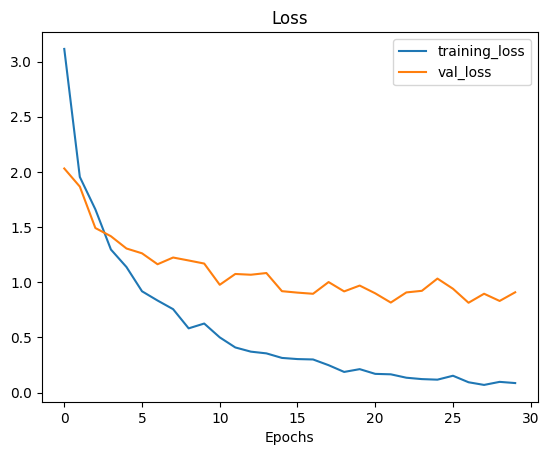

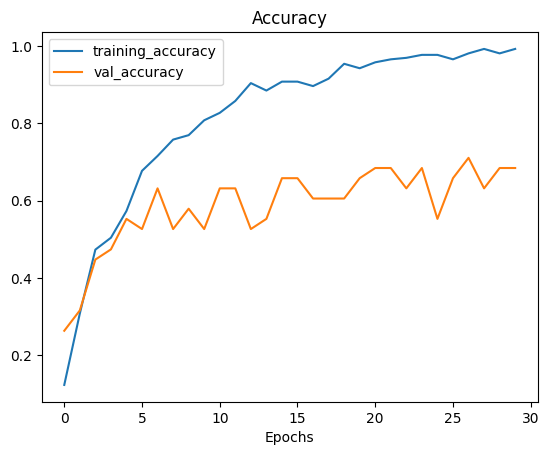

In [36]:
plot_loss_curves(history)

In [37]:
train_data.class_indices

{'masyihia': 0,
 'sequee': 1,
 'sequeeiraq': 2,
 'shagra': 3,
 'sukari': 4,
 'sukari_macnooz': 5}

In [38]:
pred = model.predict(new_img)
pred = pred.argmax(axis=1)
pred = [k for k, v in train_data.class_indices.items() if v == pred[0]][0]
print(f"Prediction Results : {pred}")

1/1 [==============================] - 2s 2s/step
Prediction Results : sukari
